## 다음 분기에는 어떤 게임을 출시하는게 좋을까요?

1. EDA 진행. 데이터의 결측치와 정보들을 확인해봄.

In [75]:
import pandas as pd

df = pd.read_csv('vgames2.csv')
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [76]:
df = df.drop(df.columns[0], axis=1) # 쓸데없는 column

In [77]:
df.info() #Name, Platform, Genre, Publisher 는 문자데이터. Sales는 왜 object인가?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [78]:
Sales = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
Sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,0.04,0,0,0
1,0.17,0,0,0.01
2,0,0,0.02,0
3,0.04,0,0,0
4,0.12,0.09,0,0.04
...,...,...,...,...
16593,0.15,0.04,0,0.01
16594,0.01,0,0,0
16595,0.44,0.19,0.03,0.13
16596,0.05,0.05,0.25,0.03


In [79]:
Sales = Sales.apply(lambda x: x.str.strip('M'), axis = 1) #기본적으로 Million 단위이니 M은 그냥 삭제
Sales1 = Sales.apply(lambda x: x.str.replace('K','/1000')) # K는 /1000 으로 변경.
Sales1[1:15]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,0.17,0,0,0.01
2,0,0,0.02,0
3,0.04,0,0,0
4,0.12,0.09,0,0.04
5,0,0,0.14,0
6,0.02,0.01,0,0
7,0.07,0,0.11,0.01
8,0,0,0.04,0
9,0.04,0.03,0,0.01
10,480/1000,0.33,0/1000,0.06


In [80]:
Sales1['NA_Sales'] = Sales1['NA_Sales'].apply(eval) #eval 함수로 문자열로 된 식을 실행.
Sales1['EU_Sales'] = Sales1['EU_Sales'].apply(eval)
Sales1['JP_Sales'] = Sales1['JP_Sales'].apply(eval)
Sales1['Other_Sales'] = Sales1['Other_Sales'].apply(eval)

In [81]:
Sales1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NA_Sales     16598 non-null  float64
 1   EU_Sales     16598 non-null  float64
 2   JP_Sales     16598 non-null  float64
 3   Other_Sales  16598 non-null  float64
dtypes: float64(4)
memory usage: 518.8 KB


In [82]:
Sales1.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000
mean,0.264667,0.146652,0.077782,0.048063
std,0.816683,0.505351,0.309291,0.188588
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.080000,0.020000,0.000000,0.010000
75%,0.240000,0.110000,0.040000,0.040000
max,41.490000,29.020000,10.220000,10.570000


In [83]:
for i in range(len(df['Year'])): #데이터가 21이하면 +2000을 해주고 22이상 100 미만이면 1900을 더해줌.
  if df['Year'][i] <= 21:
    df['Year'][i] = 2000 + df['Year'][i]
  elif 22 <= df['Year'][i] < 100:
    df['Year'][i] = 1900 + df['Year'][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [84]:
df = df.drop(columns=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'])
df = pd.concat([df,Sales1],axis=1)

In [85]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [86]:
df = df.drop_duplicates() #혹시 모를 중복값 삭제. Parameter를 지정해주지 않으면 모든 열을 기준으로 중복된 결과를 삭제해줌.
df = df.fillna(method='pad') #결측치를 한 값으로 몰리지 않고 비교적 다양하게 분포시키기 위해 앞에 있는 데이터를 복사함으로써 비교적 골고루 퍼뜨릴 수 있게 결측치 대체.

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16597 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16597 non-null  object 
 1   Platform     16597 non-null  object 
 2   Year         16597 non-null  float64
 3   Genre        16597 non-null  object 
 4   Publisher    16597 non-null  object 
 5   NA_Sales     16597 non-null  float64
 6   EU_Sales     16597 non-null  float64
 7   JP_Sales     16597 non-null  float64
 8   Other_Sales  16597 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.3+ MB


In [88]:
df['World_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales'] #전세계의 출고량
df['World_Sales'].head()
df['Count'] = 1 #후에 카운트를 계산하기 위해 카운트 feature를 추가

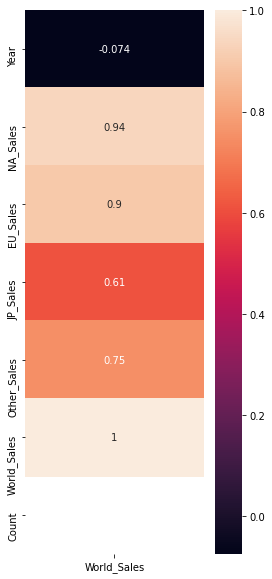

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(4, 10))
sns.heatmap(df.corr()[['World_Sales']], annot=True)

In [90]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,World_Sales,Count
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04,1
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,1
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02,1
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,1
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,1


In [91]:
Genre_Sales = df.groupby('Genre').sum()['World_Sales'] #장르에 따른 세계 판매량.
Publisher_Sales = df.groupby('Publisher').sum()['World_Sales'] #제작사에 따른 세계 판매량
Platform_Sales = df.groupby('Platform').sum()['World_Sales'] #플랫폼에 따른 세계 판매량
Genre_counts = df.groupby('Genre').count()['World_Sales'] #장르 마다의 게임 갯수 
Publisher_counts = df.groupby('Publisher').count()['World_Sales'] #제작사 마다의 게임 갯수
Platform_counts = df.groupby('Platform').count()['World_Sales'] #플랫폼 마다의 게임 갯수

In [92]:
 Genre_Sales = Genre_Sales.reset_index()
 Publisher_Sales = Publisher_Sales.reset_index()
 Platform_Sales = Platform_Sales.reset_index()
 Genre_counts = Genre_counts.reset_index()
 Publisher_counts = Publisher_counts.reset_index()
 Platform_counts = Platform_counts.reset_index()

In [93]:
Genre_Sales.sort_values(by=['Genre'],axis=0,inplace=True)
Publisher_Sales.sort_values(by=['Publisher'],axis=0,inplace=True)
Platform_Sales.sort_values(by=['Platform'],axis=0,inplace=True)
Genre_counts.sort_values(by=['Genre'],axis=0,inplace=True)
Publisher_counts.sort_values(by=['Publisher'],axis=0,inplace=True)
Platform_counts.sort_values(by=['Platform'],axis=0,inplace=True)

In [94]:
Genre_Sales = Genre_Sales.merge(Genre_counts, how = 'inner', on = 'Genre')
Publisher_Sales = Publisher_Sales.merge(Publisher_counts, how = 'inner', on = 'Publisher')
Platform_Sales = Platform_Sales.merge(Platform_counts, how = 'inner', on = 'Platform')

# Genre_Sales = Genre_Sales.reset_index()
# Publisher_Sales = Publisher_Sales.reset_index()
# Platform_Sales = Platform_Sales.reset_index()


# Genre_Sales = pd.concat([Genre_counts, Genre_Sales],axis=1)
# Publisher_Sales = pd.concat([Publisher_counts,Publisher_Sales],axis=1)
# Platform_Sales = pd.concat([Platform_counts,Platform_Sales],axis=1)


In [95]:
Genre_Sales.rename(columns= {'World_Sales_x': 'World_Sales','World_Sales_y':'Count'}, inplace = True)
Publisher_Sales.rename(columns= {'World_Sales_x': 'World_Sales','World_Sales_y':'Count'}, inplace = True)
Platform_Sales.rename(columns= {'World_Sales_x': 'World_Sales','World_Sales_y':'Count'}, inplace = True)

In [96]:
Genre_Sales['Genre_Sales'] = Genre_Sales['World_Sales']/Genre_Sales['Count'] # 평균 출고량.
Publisher_Sales['Publisher_Sales'] = Publisher_Sales['World_Sales']/Publisher_Sales['Count']
Platform_Sales['Platform_Sales'] = Platform_Sales['World_Sales']/Platform_Sales['Count']
Genre_Sales

,Genre,World_Sales,Count,Genre_Sales
0,Action,1750.87,3314,0.528325
1,Adventure,241.54,1283,0.188262
2,Fighting,449.85,850,0.529235
3,Misc,808.59,1738,0.465242
4,Platform,831.87,888,0.936791
5,Puzzle,244.61,580,0.421741
6,Racing,730.43,1246,0.586220
7,Role-Playing,905.13,1485,0.609515
8,Shooter,1039.99,1312,0.792675
9,Simulation,391.60,866,0.452194


In [97]:
Genre_Sales.sort_values(by=['Genre_Sales'],axis=0,inplace=True,ascending=False)
Publisher_Sales.sort_values(by=['Publisher_Sales'],axis=0,inplace=True,ascending=False)
Platform_Sales.sort_values(by=['Platform_Sales'],axis=0,inplace=True,ascending=False)

In [98]:
Genre_Sales = Genre_Sales.reset_index()
Genre_Sales = Genre_Sales.drop(Genre_Sales.columns[0], axis=1)
Publisher_Sales = Publisher_Sales.reset_index()
Publisher_Sales = Publisher_Sales.drop(Publisher_Sales.columns[0], axis=1)
Platform_Sales = Platform_Sales.reset_index()
Platform_Sales = Platform_Sales.drop(Platform_Sales.columns[0], axis=1)

In [110]:
Genre_Sales_chi = Genre_Sales.drop(columns=['Genre','World_Sales'])
Publisher_Sales_chi = Publisher_Sales.drop(columns=['Publisher','World_Sales'])
Platform_Sales_chi = Platform_Sales.drop(columns=['Platform','World_Sales'])

In [113]:
from scipy.stats import chi2_contingency #p-value가 0.996으로 각 장르의 게임 출시량과 게임 하나당 판매량은 서로 연관이 없다.
chi2 = chi2_contingency(Genre_Sales_chi, correction = False)
chi2[1]

0.9965331680007778

In [114]:
chi2 = chi2_contingency(Publisher_Sales_chi, correction = False) #제작사의 게임 제작량과 게임 당 판매량은 서로 연관이 있다.
chi2[1]

0.0

In [115]:
chi2 = chi2_contingency(Platform_Sales_chi, correction = False) #게임 플랫폼마다의 게임 출시량과 게임 당 판매량은 서로 연관이 없다.
chi2[1]

3.7813406058975538e-25

In [104]:
Publisher_Sales.sort_values(by=['Publisher_Sales'],axis=0,inplace=True,ascending=False)
Platform_Sales.sort_values(by=['Platform_Sales'],axis=0,inplace=True,ascending=False)

In [31]:
Genre_Sales

,Genre,World_Sales,Count,Genre_Sales
0,Platform,831.87,888,0.936791
1,Shooter,1039.99,1312,0.792675
2,Role-Playing,905.13,1485,0.609515
3,Racing,730.43,1246,0.586220
4,Sports,1346.51,2355,0.571766
5,Fighting,449.85,850,0.529235
6,Action,1750.87,3314,0.528325
7,Misc,808.59,1738,0.465242
8,Simulation,391.60,866,0.452194
9,Puzzle,244.61,580,0.421741


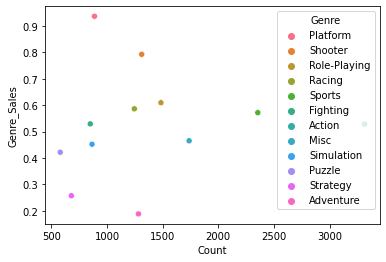

In [32]:
sns.scatterplot(x="Count", y="Genre_Sales", hue="Genre", data=Genre_Sales)

In [57]:
Publisher_Sales

,Publisher,World_Sales,Count,Publisher_Sales
0,Palcom,4.17,1,4.170000
1,Red Orb,5.25,2,2.625000
2,Nintendo,1786.80,705,2.534468
3,Arena Entertainment,4.72,2,2.360000
4,UEP Systems,2.26,1,2.260000
...,...,...,...,...
558,Piacci,0.01,1,0.010000
562,Naxat Soft,0.01,1,0.010000
571,Epic Games,0.01,1,0.010000
559,Nitroplus,0.02,2,0.010000


In [135]:
df_Platform = df[['Publisher','Platform','Genre','World_Sales','Count']]
df_Platform = df_Platform.groupby(['Publisher','Platform','Genre'])
df_Platform = df_Platform.sum()
# df_Platform = df_Platform.reset_index()
df_Platform['Genre_Sales'] = df_Platform['World_Sales'] / df_Platform['Count']
df_Platform

World_Sales  Count  Genre_Sales
Publisher            Platform Genre                                        
10TACLE Studios      DS       Puzzle               0.03      1         0.03
                              Strategy             0.06      1         0.06
                     PS2      Adventure            0.02      1         0.02
1C Company           PC       Racing               0.04      1         0.04
                              Role-Playing         0.01      1         0.01
...                                                 ...    ...          ...
imageepoch Inc.      3DS      Role-Playing         0.03      1         0.03
inXile Entertainment PC       Role-Playing         0.09      1         0.09
mixi, Inc            3DS      Action               0.86      1         0.86
responDESIGN         PS2      Sports               0.05      1         0.05
                     XB       Sports               0.09      1         0.09

[5061 rows x 3 columns]

In [142]:
df_Platform.sort_values(by=['Count'],axis=0,inplace=True,ascending=False)

In [143]:
df_Platform

World_Sales  ...  Genre_Sales
Publisher                    Platform Genre                      ...             
Electronic Arts              PS2      Sports             133.74  ...     1.311176
                             X360     Sports              75.88  ...     1.025405
Konami Digital Entertainment PS2      Sports              39.17  ...     0.602615
Electronic Arts              PS3      Sports              77.83  ...     1.197385
Ubisoft                      DS       Simulation          30.81  ...     0.474000
...                                                         ...  ...          ...
NEC Interchannel             SAT      Role-Playing         0.13  ...     0.130000
DreamWorks Interactive       PS       Platform             0.13  ...     0.130000
Atari                        PS3      Shooter              0.13  ...     0.130000
Spike                        DS       Role-Playing         0.13  ...     0.130000
Funbox Media                 PSV      Strategy             0.01  ...     0.010000

[5061 rows x 3 columns]

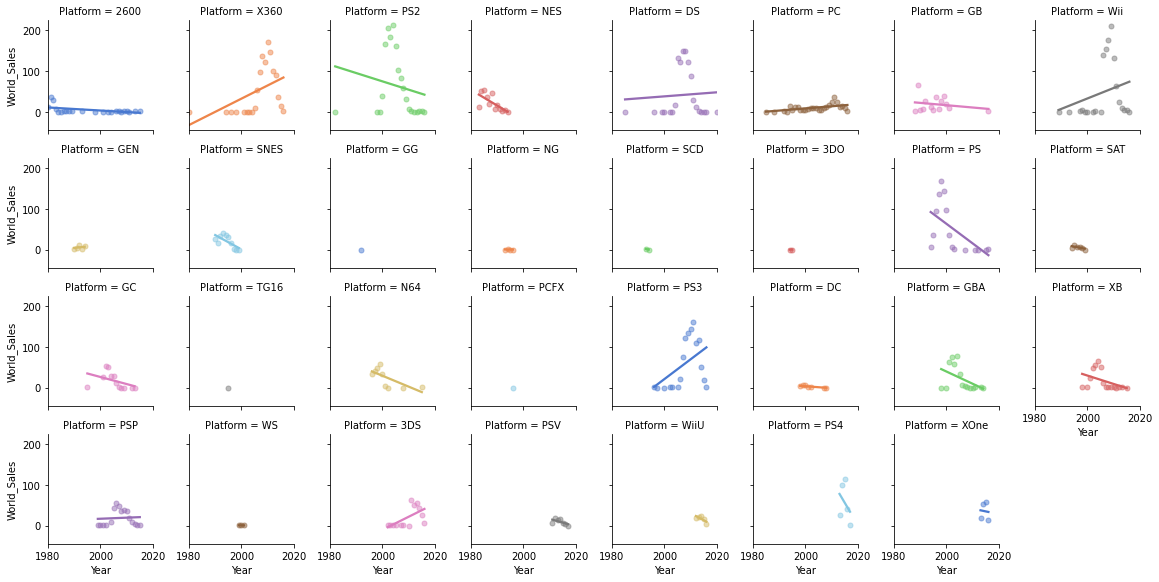

In [48]:
sns.lmplot(x="Year", y="World_Sales", col="Platform", hue="Platform", data=df_Platform,
           col_wrap=8, ci=None, palette="muted", height=2,
           scatter_kws={"s": 25, "alpha": 0.5})

In [35]:
df_Year = df[['Year','Genre','World_Sales','Count']]
df_Year = df_Year.groupby(['Year','Genre'])
df_Year = df_Year.sum()
df_Year = df_Year.reset_index()
df_Year['Year_Sales'] = df_Year['World_Sales'] / df_Year['Count']
df_Year

,Year,Genre,World_Sales,Count,Year_Sales
0,1980.0,Action,0.79,2,0.395
1,1980.0,Fighting,0.77,1,0.770
2,1980.0,Misc,2.70,4,0.675
3,1980.0,Platform,0.50,1,0.500
4,1980.0,Shooter,7.07,2,3.535
...,...,...,...,...,...
384,2016.0,Sports,14.63,38,0.385
385,2016.0,Strategy,0.52,10,0.052
386,2017.0,Action,0.01,1,0.010
387,2017.0,Role-Playing,0.04,2,0.020


In [36]:
df_Genre = df[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
df_Genre = df_Genre.groupby(['Genre'])
df_Genre = df_Genre.mean()
df_Genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,0.265121,0.157993,0.048365,0.056847
Adventure,0.083546,0.050592,0.040701,0.013422
Fighting,0.263118,0.119376,0.103518,0.043224
Misc,0.235978,0.124264,0.062002,0.042998
Platform,0.503694,0.227658,0.147151,0.058288
Puzzle,0.213517,0.088034,0.098552,0.021638
Racing,0.287648,0.190634,0.045915,0.062022
Role-Playing,0.215212,0.123650,0.232290,0.038364
Shooter,0.445160,0.239040,0.029992,0.078483


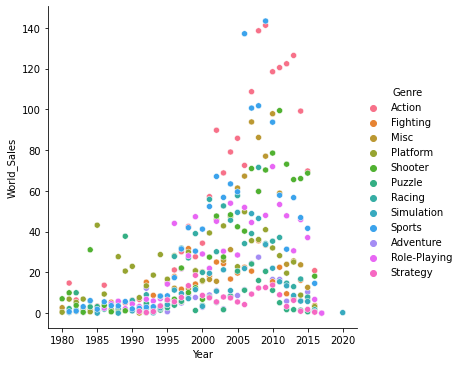

In [37]:
import seaborn as sns

sns.relplot(data = df_Year, x='Year', y='World_Sales', hue = 'Genre')

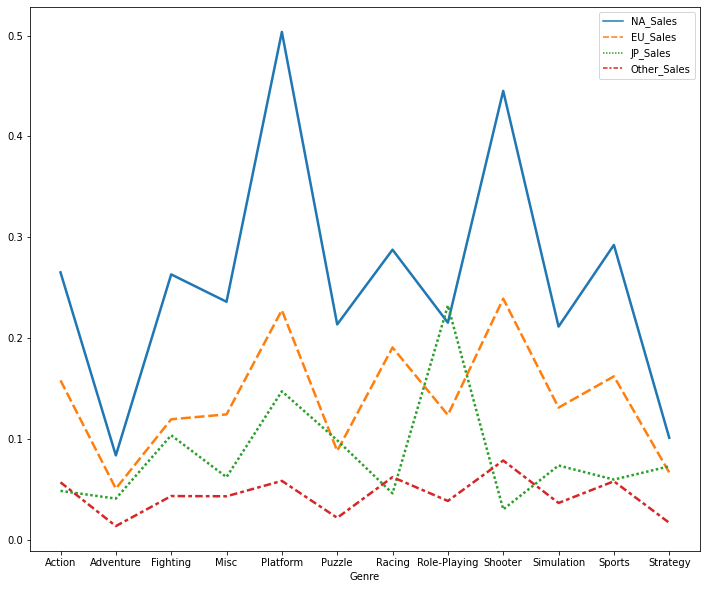

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10)) 
sns.lineplot(data = df_Genre,palette="tab10", linewidth=2.5)

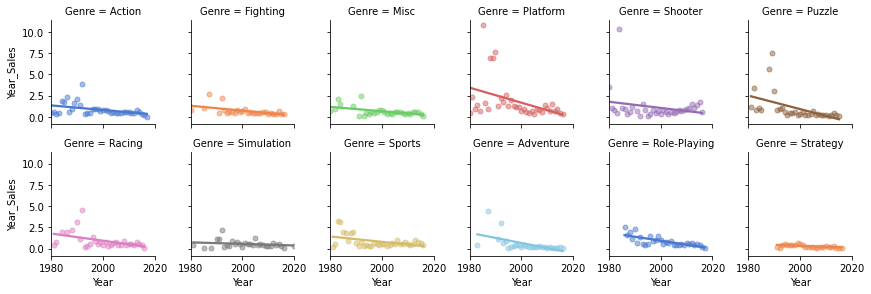

In [39]:
sns.lmplot(x="Year", y="Year_Sales", col="Genre", hue="Genre", data=df_Year,
           col_wrap=6, ci=None, palette="muted", height=2,
           scatter_kws={"s": 25, "alpha": 0.5})

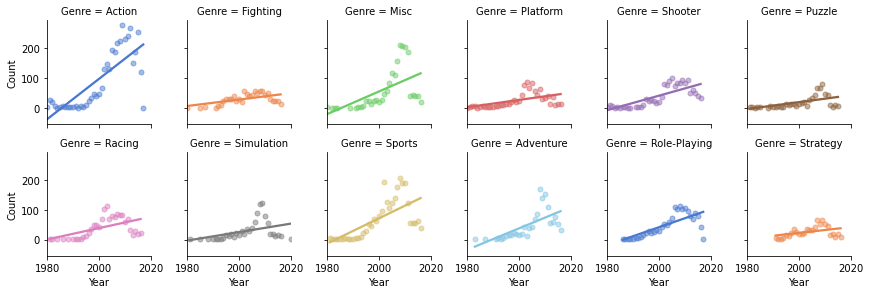

In [40]:
sns.lmplot(x="Year", y="Count", col="Genre", hue="Genre", data=df_Year,
           col_wrap=6, ci=None, palette="muted", height=2,
           scatter_kws={"s": 25, "alpha": 0.5})